##### <font color=green> Buscar un conjunto de datos a analizar:
##### <font color=green> * Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


##### <font color=green> Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
##### <font color=green> * Esto se hace para que comprendais mejor los datos con los que estais trabajando.
##### <font color=green> * Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

 `Hemos escogido un dataset de características y precios de coches.`

In [60]:
df = pd.read_csv("datos/cars_price.csv")
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


Hacemos una pequeña descripción de las variables de nuestro dataset:

- ID: número de identificación.
- PRICE: precio.
- LEVY: impuestos.
- MANUFACTURER: fabricante.
- MODEL: modelo.
- PROD. YEAR: año de producción del coche.
- CATEGORY: marca..
- LEATHER INTERIOR: si el coche tiene cuero en su interior.
- FUEL TYPE: tipo de combustible.
- ENGINE VOLUME: volúmen del motor.
- MILEAGE: kilometraje recorrido.
- CYLINDERS: número de cilindros.
- GEAR BOX TIPE: tipo de caja de cambios.
- DRIVE WHEELS: tipo de tracción de las ruedas.
- DOORS: número de puertas.
- WHEEL: ruedas.
- COLOR: color del coche.
- AIRBAGS: número de bolsas de aire que tiene.

- Vemos la información general del dataframe.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- Eliminamos la columna ID ya que no nos parece relevante

In [62]:
df = df.drop(columns=["ID"])

- Hacemos limpieza de la colummna `Doors` para que se quede solo con el número de puertas y transformarla a tipo categórico. 

In [63]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [64]:
df['Doors'] = df['Doors'].str.split('-').str[0]

In [65]:
df['Doors'] = df['Doors'].str.replace('>', ' ')

In [66]:
df = df.astype({'Doors':'category'})

Observamos que tenemos las columnas 'Mileage' y 'Levy' para convertirlas a tipo int. Primero haremos la limpieza de cada columna para luego hacer la conversión.

In [67]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [68]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

- Limpiamos la columna 'Mileage' para que solo se quede con el nro de kilometraje.

In [69]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]

In [70]:
df['Levy'] = df['Levy'].str.replace('-', '0')

- Hacemos las comprobaciones correspondientes para comprobar los valores únicos de las columnas que hemos limpiado. 

In [71]:
df['Doors'].unique()

['04', '02', ' 5']
Categories (3, object): [' 5', '02', '04']

In [72]:
df['Mileage'].unique()

array(['186005', '192000', '200000', ..., '140607', '307325', '186923'],
      dtype=object)

In [73]:
df['Levy'].unique()

array(['1399', '1018', '0', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

- Convertimos las columnas 'Mileage' y 'levy' a tipo int.

In [74]:
df = df.astype({'Mileage':'int64', 'Levy':'int64'})

- Verificamos que se haya hecho el cambio de tipo de datos correctamente para las columnas 'Doors', 'Milage' y 'Levy'. 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             19237 non-null  int64   
 1   Levy              19237 non-null  int64   
 2   Manufacturer      19237 non-null  object  
 3   Model             19237 non-null  object  
 4   Prod. year        19237 non-null  int64   
 5   Category          19237 non-null  object  
 6   Leather interior  19237 non-null  object  
 7   Fuel type         19237 non-null  object  
 8   Engine volume     19237 non-null  object  
 9   Mileage           19237 non-null  int64   
 10  Cylinders         19237 non-null  float64 
 11  Gear box type     19237 non-null  object  
 12  Drive wheels      19237 non-null  object  
 13  Doors             19237 non-null  category
 14  Wheel             19237 non-null  object  
 15  Color             19237 non-null  object  
 16  Airbags           1923

- Vamos a eliminar la columna 'Wheel' porque creemos que no aporta información necesaria para las características del coche.

In [76]:
df.drop(['Wheel'], axis = 1, inplace = True)

- Vemos el número de filas y columnas del dataframe

In [77]:
df.shape #Tiene 19237 filas y 17 columnas.

(19237, 16)

- Vemos el nombre de las columnas de nuestro dataframe

In [78]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Color',
       'Airbags'],
      dtype='object')

- Vemos los principales estadísticos de las columnas numéricas.

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,19237.0,1.855593e+04,1.905813e+05,1.0,5331.0,13172.0,22075.0,2.630750e+07
Levy,19237.0,6.325287e+02,5.677217e+02,0.0,0.0,642.0,917.0,1.171400e+04
Prod. year,19237.0,2.010913e+03,5.668673e+00,1939.0,2009.0,2012.0,2015.0,2.020000e+03
Mileage,19237.0,1.532236e+06,4.840387e+07,0.0,70139.0,126000.0,188888.0,2.147484e+09
Cylinders,19237.0,4.582991e+00,1.199933e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,19237.0,6.582627e+00,4.320168e+00,0.0,4.0,6.0,12.0,1.600000e+01


- Vemos los principales estadisticos de las variables categóricas

In [80]:
df.describe(include ="object").T

,count,unique,top,freq
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
Category,19237,11,Sedan,8736
Leather interior,19237,2,Yes,13954
Fuel type,19237,7,Petrol,10150
Engine volume,19237,107,2,3916
Gear box type,19237,4,Automatic,13514
Drive wheels,19237,3,Front,12874
Color,19237,16,Black,5033


- Vemos los valores nulos en el dataframe

In [81]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Color               0
Airbags             0
dtype: int64

- Vemos los duplicados

In [82]:
df.duplicated().sum()

3512

- Eliminamos los duplicados

In [83]:
df = df.drop_duplicates()

In [84]:
df.duplicated().sum()

0

- Chequeamos los outliers visualmente.

In [85]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,13328,1399,2010,186005,6.0,12
1,16621,1018,2011,192000,6.0,8


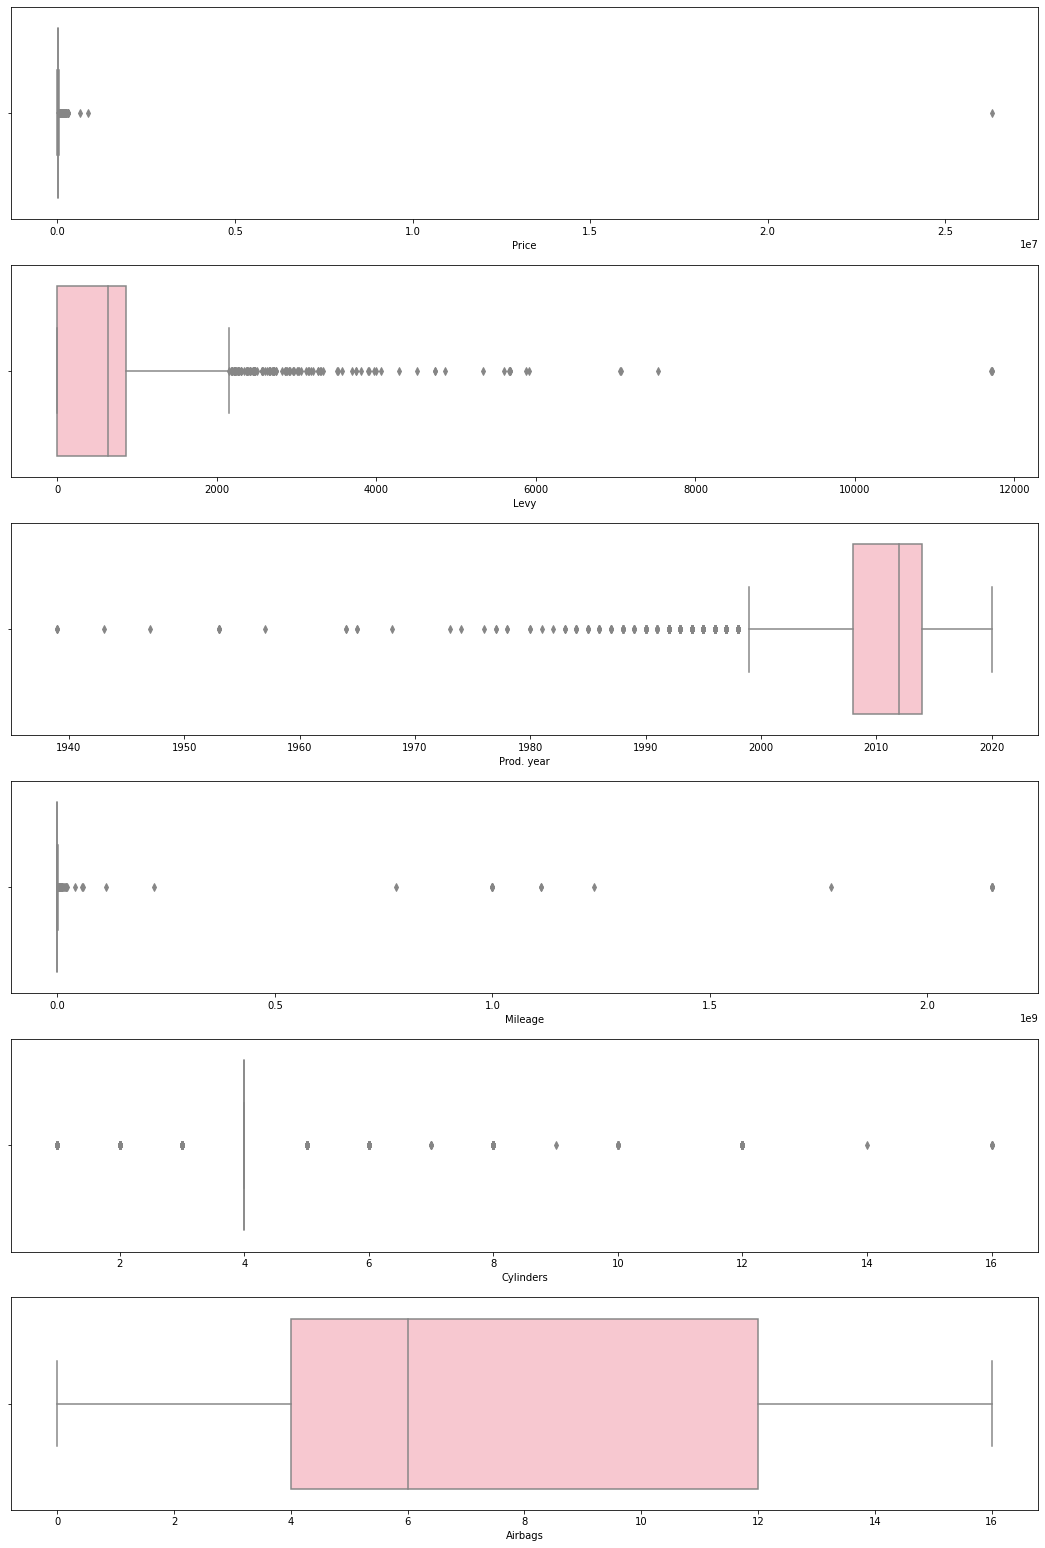

In [86]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Observando los outliers creemos necesario hacer un filtrado general por la `Prod. year` que sea mayor al año 2000. Ya que los precios para los años anteriores no los consideramos representativos para poder predecir el precio de los coches.

In [87]:
df_limpio = df[df['Prod. year'] > 2000]
df_limpio

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,50,0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04,Silver,6
19230,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04,Silver,12
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04,Grey,4


También hemos observado que al hacer el filtrado por el año hemos eliminado el registro que representaba un outlier en el precio, es decir, era un valor mucho más elevado que el resto.

Revisamos los outliers nuevamente después de nuestra primera limpieza. 

In [88]:
numericas = df_limpio.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,13328,1399,2010,186005,6.0,12
1,16621,1018,2011,192000,6.0,8


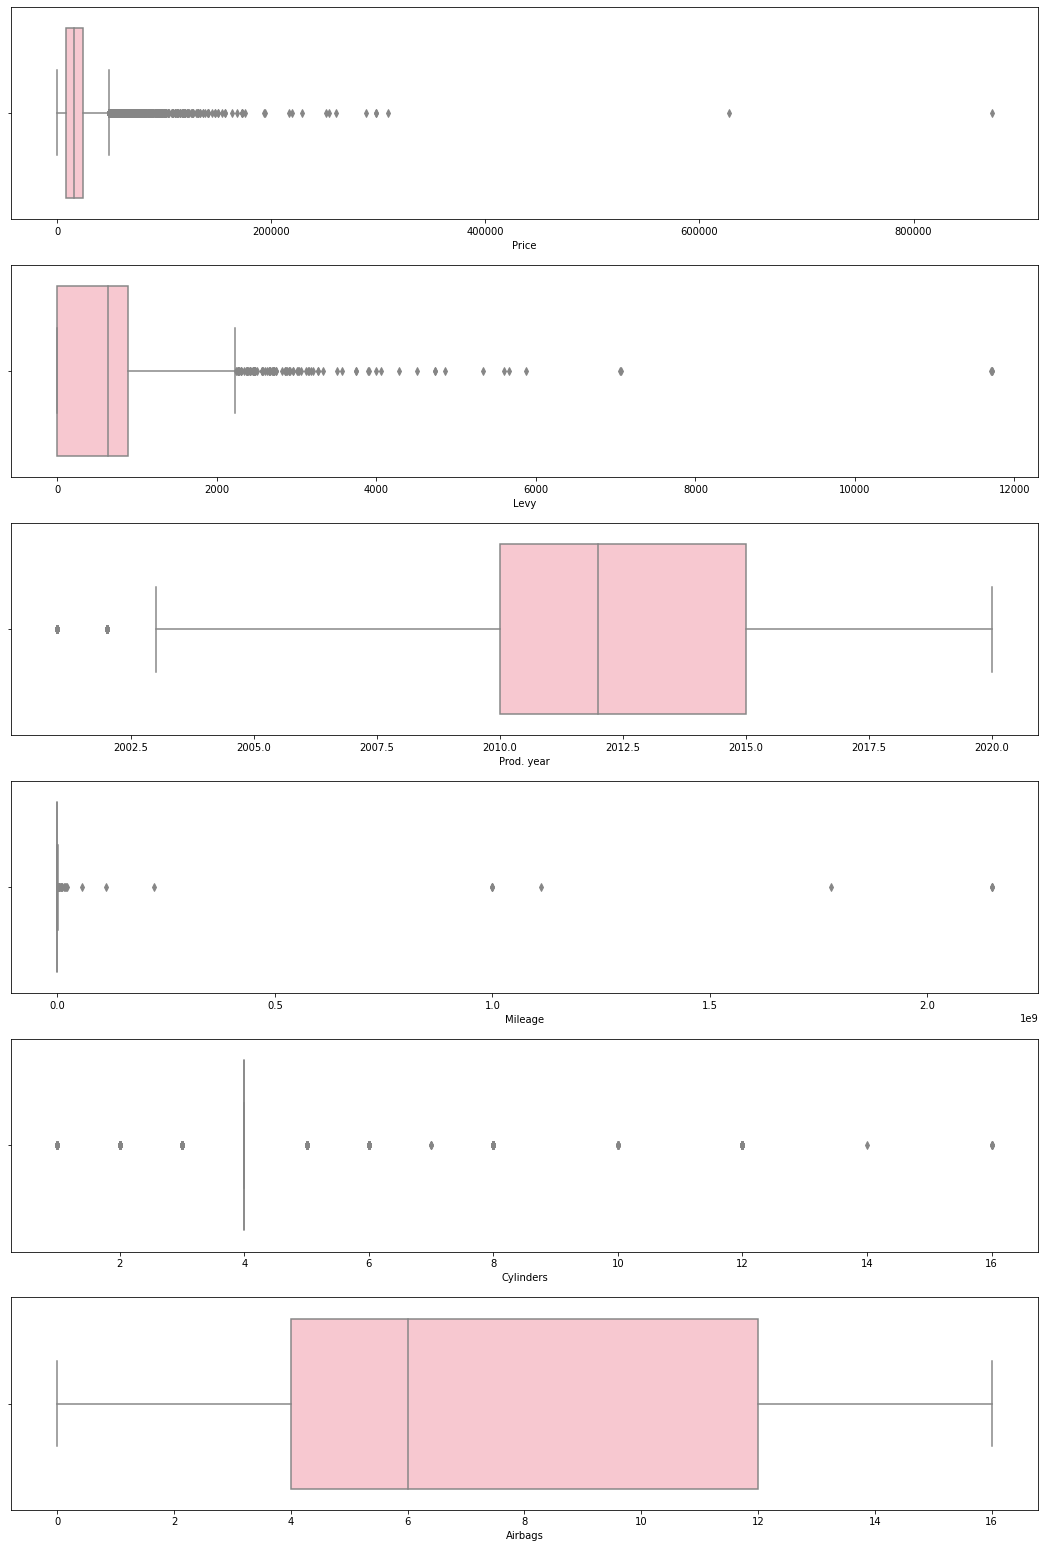

In [89]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Hemos decidido hacer nuevamente un filtrado por el precio para eliminar los dos registros que tenían el valor muy alto dentro de la columna price, es decir, vamos a hacer un filtrado por el precio que sea menos a 400000.

In [90]:
df_limpio = df_limpio[df_limpio['Price'] <= 400000]
df_limpio

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,50,0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04,Silver,6
19230,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04,Silver,12
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04,Grey,4


Volvemos a chequear los outliers.

In [91]:
numericas = df_limpio.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,13328,1399,2010,186005,6.0,12
1,16621,1018,2011,192000,6.0,8


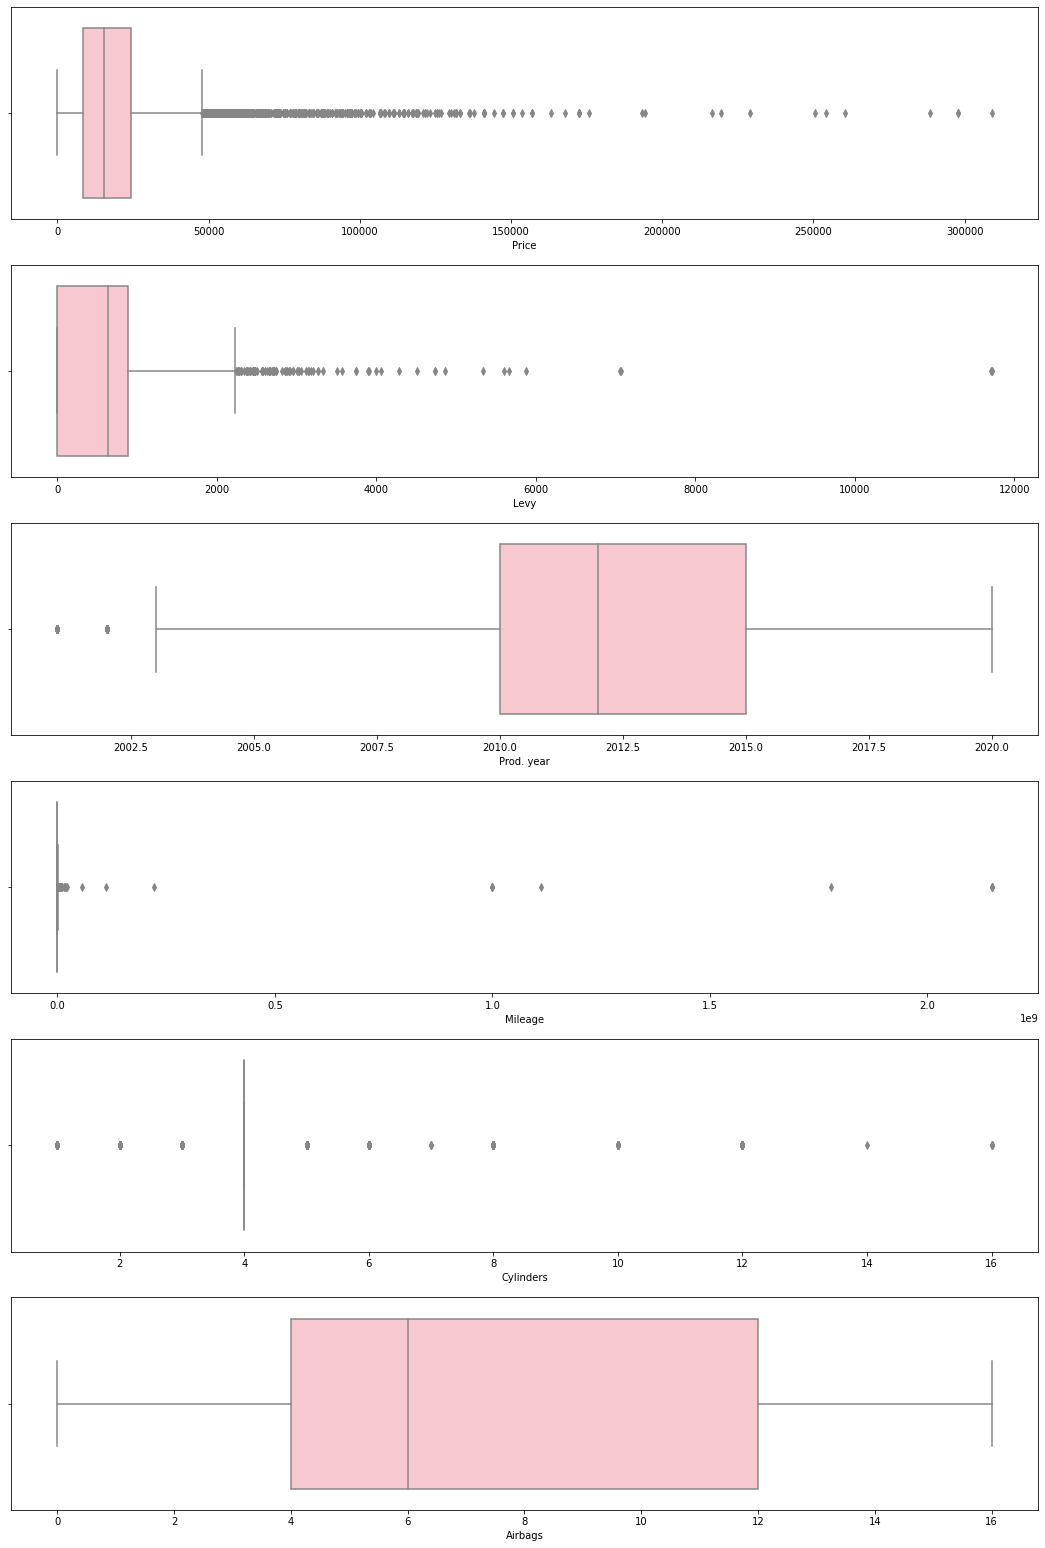

In [92]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Seguimos viendo muchos outliers para mileage, y levy, por lo tanto los vamos a sustituir por la media.

In [93]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [94]:
lista_columnas = list(df_limpio[["Mileage","Levy"]])
lista_columnas

['Mileage', 'Levy']

In [95]:
indice = detectar_outliers(lista_columnas, df_limpio)
print(indice)

{'Mileage': [8, 19, 29, 39, 65, 90, 191, 229, 252, 281, 351, 365, 369, 428, 475, 493, 517, 563, 625, 640, 731, 748, 824, 868, 918, 943, 964, 966, 1042, 1053, 1061, 1086, 1093, 1118, 1128, 1146, 1156, 1170, 1208, 1337, 1402, 1404, 1410, 1433, 1544, 1560, 1622, 1665, 1701, 1765, 1788, 1821, 1846, 1881, 1893, 1950, 1995, 2075, 2105, 2118, 2123, 2126, 2127, 2138, 2188, 2255, 2274, 2286, 2319, 2324, 2418, 2464, 2469, 2501, 2512, 2529, 2563, 2584, 2588, 2619, 2635, 2638, 2772, 2874, 2897, 2903, 2961, 2986, 3043, 3056, 3083, 3170, 3177, 3282, 3320, 3326, 3505, 3548, 3607, 3624, 3627, 3652, 3692, 3715, 3721, 3726, 3747, 3764, 3792, 3830, 3850, 3877, 3895, 3896, 3995, 4009, 4040, 4066, 4079, 4130, 4170, 4175, 4187, 4200, 4248, 4394, 4429, 4432, 4541, 4552, 4658, 4685, 4758, 4892, 4893, 4907, 4941, 4961, 4996, 5068, 5130, 5164, 5219, 5228, 5232, 5254, 5346, 5380, 5456, 5522, 5543, 5586, 5640, 5671, 5679, 5765, 5834, 5855, 5859, 5860, 5866, 5916, 5924, 5956, 5969, 6074, 6090, 6107, 6126, 6143, 61

In [96]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in indice.items():
    media = df_limpio[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df_limpio.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

- sacamos de nuevo los outliers

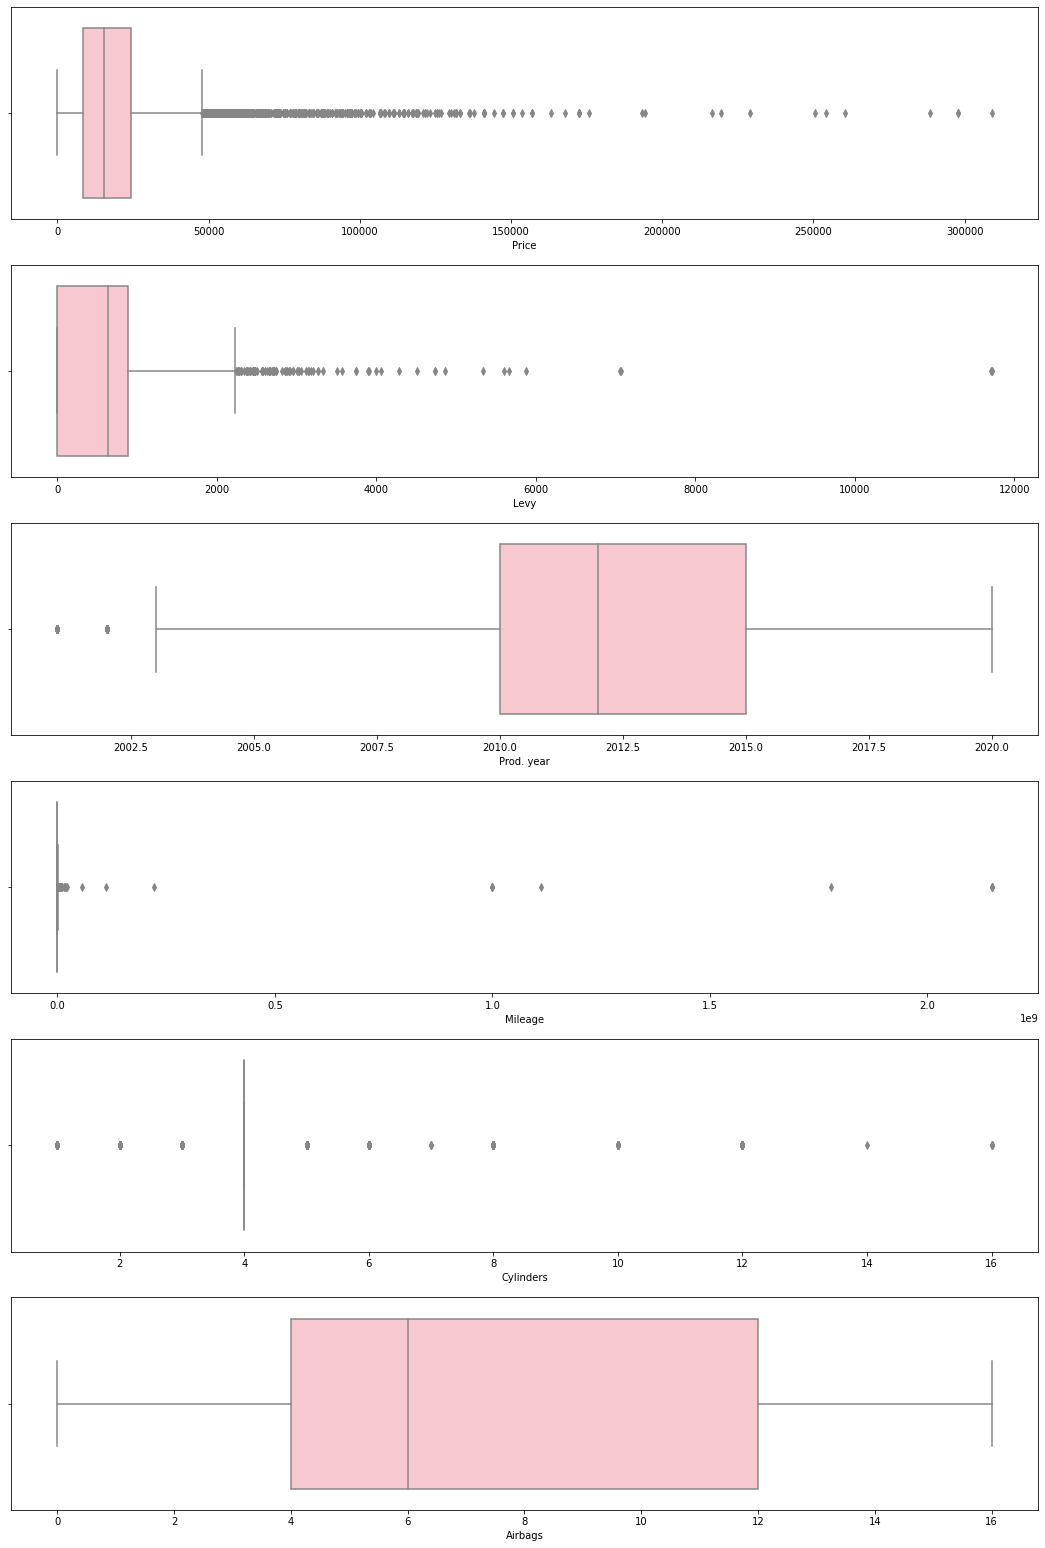

In [97]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "pink"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [98]:
df_limpio['Levy'].max()

2151.0

In [99]:
df_limpio['Price'].max()

308906

In [100]:
df_limpio['Mileage'].max()

1019978.43952782

#### <font color=violet> Hipótesis nula (H0):

- No hay efecto de las variables predictoras para que determinen el precio del coche

#### <font color=violet> Hipótesis alternativa (H1):

- Si que hay efecto de nuestras variables predictoras sobre el precio del coche

#### <font color=violet> EDA variable dependiente (Respuesta)

Hemos decidido predecir el precio de los coches en función de una serie de características. 

Por lo tanto, nuestra variable respuesta será `price` y el resto las predictoras.

- Vemos los principales estadísticos de nuestra variable `Price`

In [101]:
df_limpio['Price'].describe()

count     14486.000000
mean      19478.488334
std       19078.943278
min           1.000000
25%        8467.000000
50%       15524.000000
75%       24239.000000
max      308906.000000
Name: Price, dtype: float64

- Sacamos las características de los coches con el precio más bajo.

In [102]:
df_limpio[df_limpio['Price'] == df_limpio['Price'].min()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
16992,1,1202.0,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000.0,4.0,Manual,Front,04,Black,2


- Sacamos las características de los coches con el precio menor a 500.

In [103]:
df_menor_500 = df_limpio[df_limpio['Price'] < 500]
df_menor_500

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
27,30,0.0,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,1.690000e+05,4.0,Automatic,Front,04,White,8
33,125,1750.0,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,3.3,2.872740e+05,6.0,Automatic,4x4,04,White,12
39,314,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,1.019978e+06,6.0,Automatic,4x4,04,Silver,12
45,220,1194.0,TOYOTA,Tacoma,2013,Jeep,Yes,Petrol,4,2.393420e+05,6.0,Automatic,4x4,04,Silver,12
53,392,1017.0,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2,1.600000e+03,4.0,Automatic,Rear,04,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,831.0,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,2.563500e+04,4.0,Automatic,Front,04,Black,12
19218,30,0.0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0.000000e+00,4.0,Automatic,Front,04,Green,9
19229,50,0.0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,1.500000e+05,4.0,Automatic,Front,04,Silver,6
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,3.073250e+05,4.0,Automatic,Front,04,Silver,12


Observamos que hay un coche con precio 1 del año 2006 que no puede ser posible, y coches con precio menor a 500, que no consideramos representativos para hacer nuestro modelo de predicción. Por lo tanto vamos a prescindir de estos registros. Haremos un filtrado general para quedarnos con los coches que tienen precio de 500 en adelante.

In [104]:
df_limpio = df_limpio[df_limpio['Price'] >= 500]
df_limpio

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,0.0,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800.0,4.0,Automatic,Front,04,Black,12
19225,8781,1107.0,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000.0,4.0,Manual,Front,04,Beige,4
19226,7840,0.0,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000.0,6.0,Tiptronic,Rear,04,White,0
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04,Red,8


In [105]:
df_limpio[df_limpio['Price'] == df_limpio['Price'].min()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
13706,500,0.0,NISSAN,Tiida,2007,Hatchback,Yes,Petrol,1.8,0.0,4.0,Variator,Front,04,Grey,6


- Sacamos las características de los coches con el precio más alto.

In [106]:
df_limpio[df_limpio['Price']== df_limpio['Price'].max()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
5008,308906,1694.0,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690.0,6.0,Automatic,Rear,02,Black,12


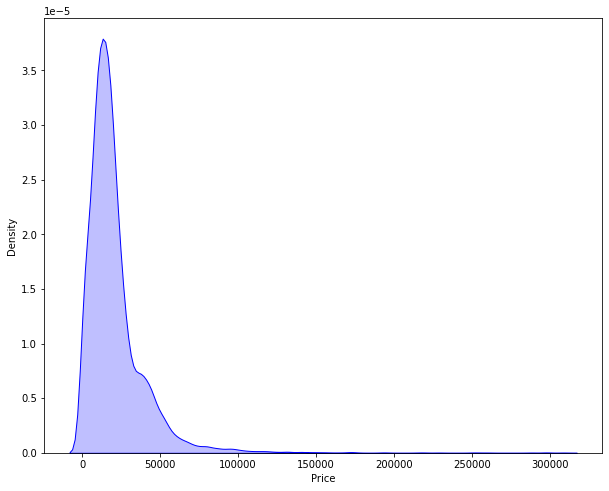

In [107]:
sns.distplot(
    df_limpio["Price"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

#### <font color=violet> EDA variables independientes (Predictoras)

##### Variables númericas

In [108]:
df_limpio.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13584.0,20756.667329,19024.644961,500.0,9885.75,16308.0,25089.00,3.089060e+05
Levy,13584.0,581.027664,462.942608,0.0,0.00,640.0,880.00,2.151000e+03
Prod. year,13584.0,2011.728578,4.203401,2001.0,2010.00,2012.0,2015.00,2.020000e+03
Mileage,13584.0,146846.679142,165138.041881,0.0,68000.00,119386.5,173101.25,1.019978e+06
Cylinders,13584.0,4.460247,1.119606,1.0,4.00,4.0,4.00,1.600000e+01
Airbags,13584.0,6.733657,3.961573,0.0,4.00,6.0,12.00,1.600000e+01


- hacemos un gráfico de todas nuestras variables numéricas

In [109]:
df_limpio.select_dtypes(include = np.number).columns

Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags'], dtype='object')

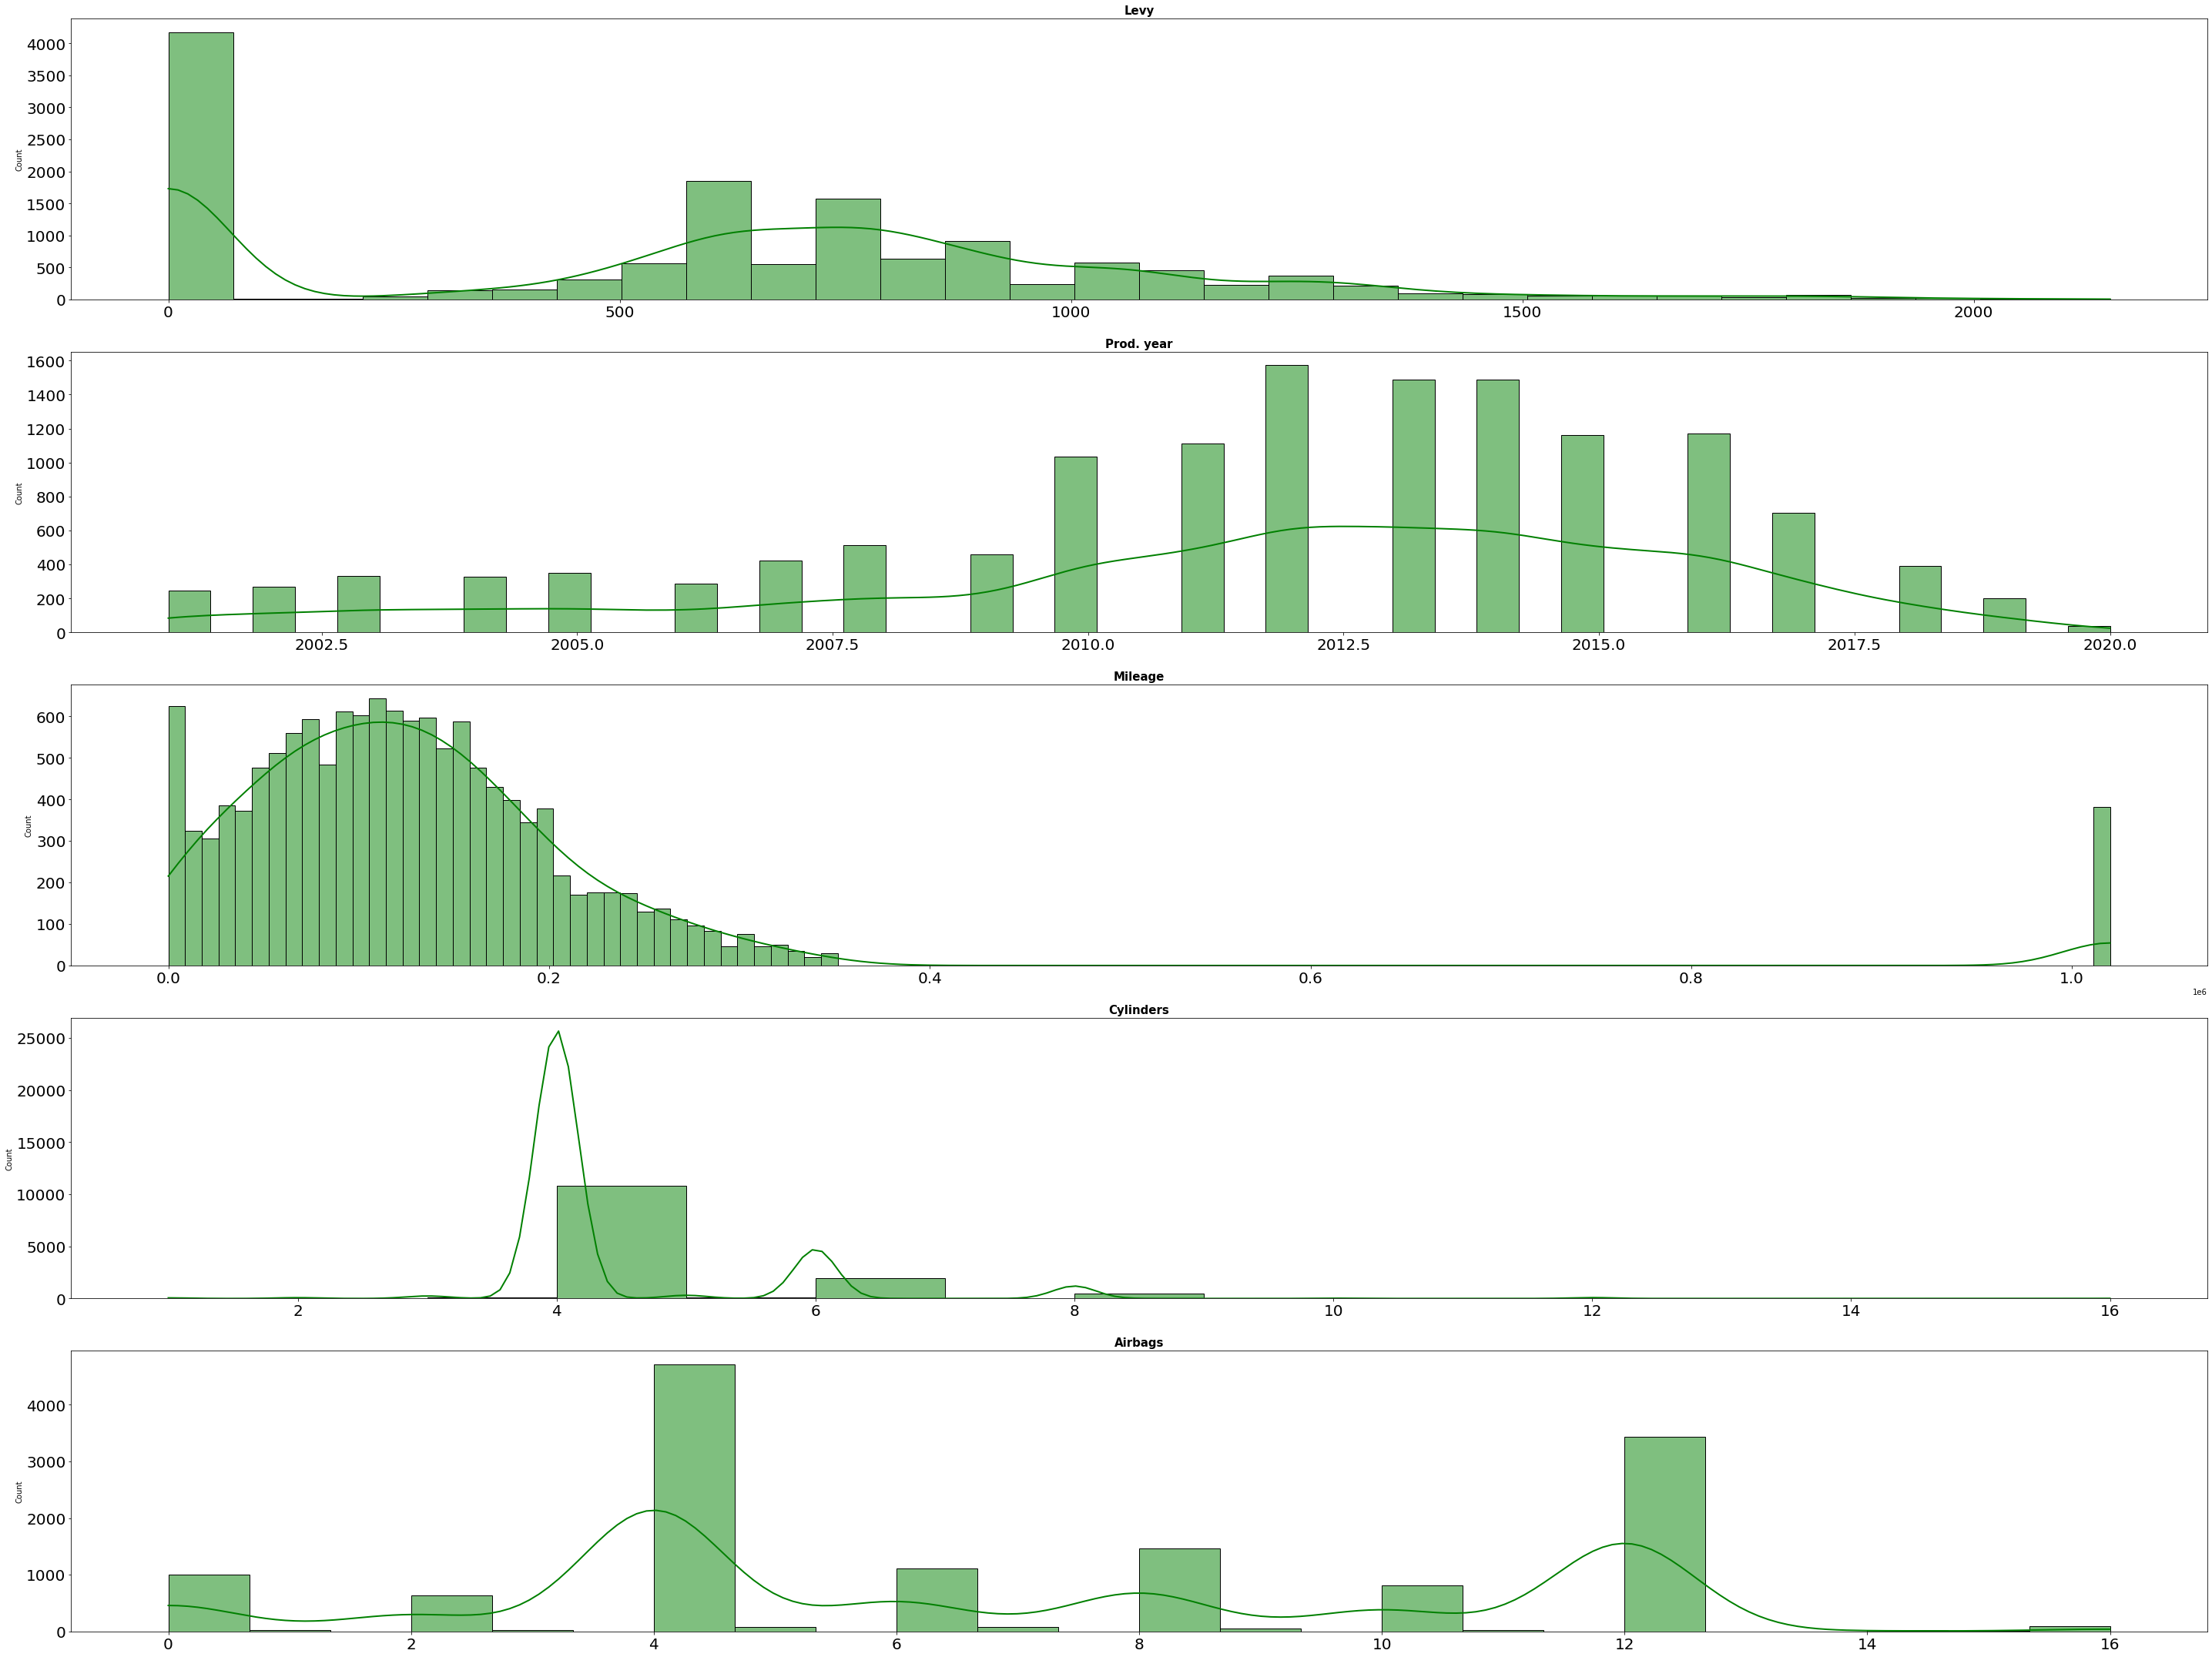

In [110]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (40, 30))


axes = axes.flat

columnas_numeric = df_limpio.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Price")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_limpio,
        x = colum,
        kde = True, 
        color = "Green", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

- Hacemos un gráfico de relación entre variables predictoras y la variable a predecir

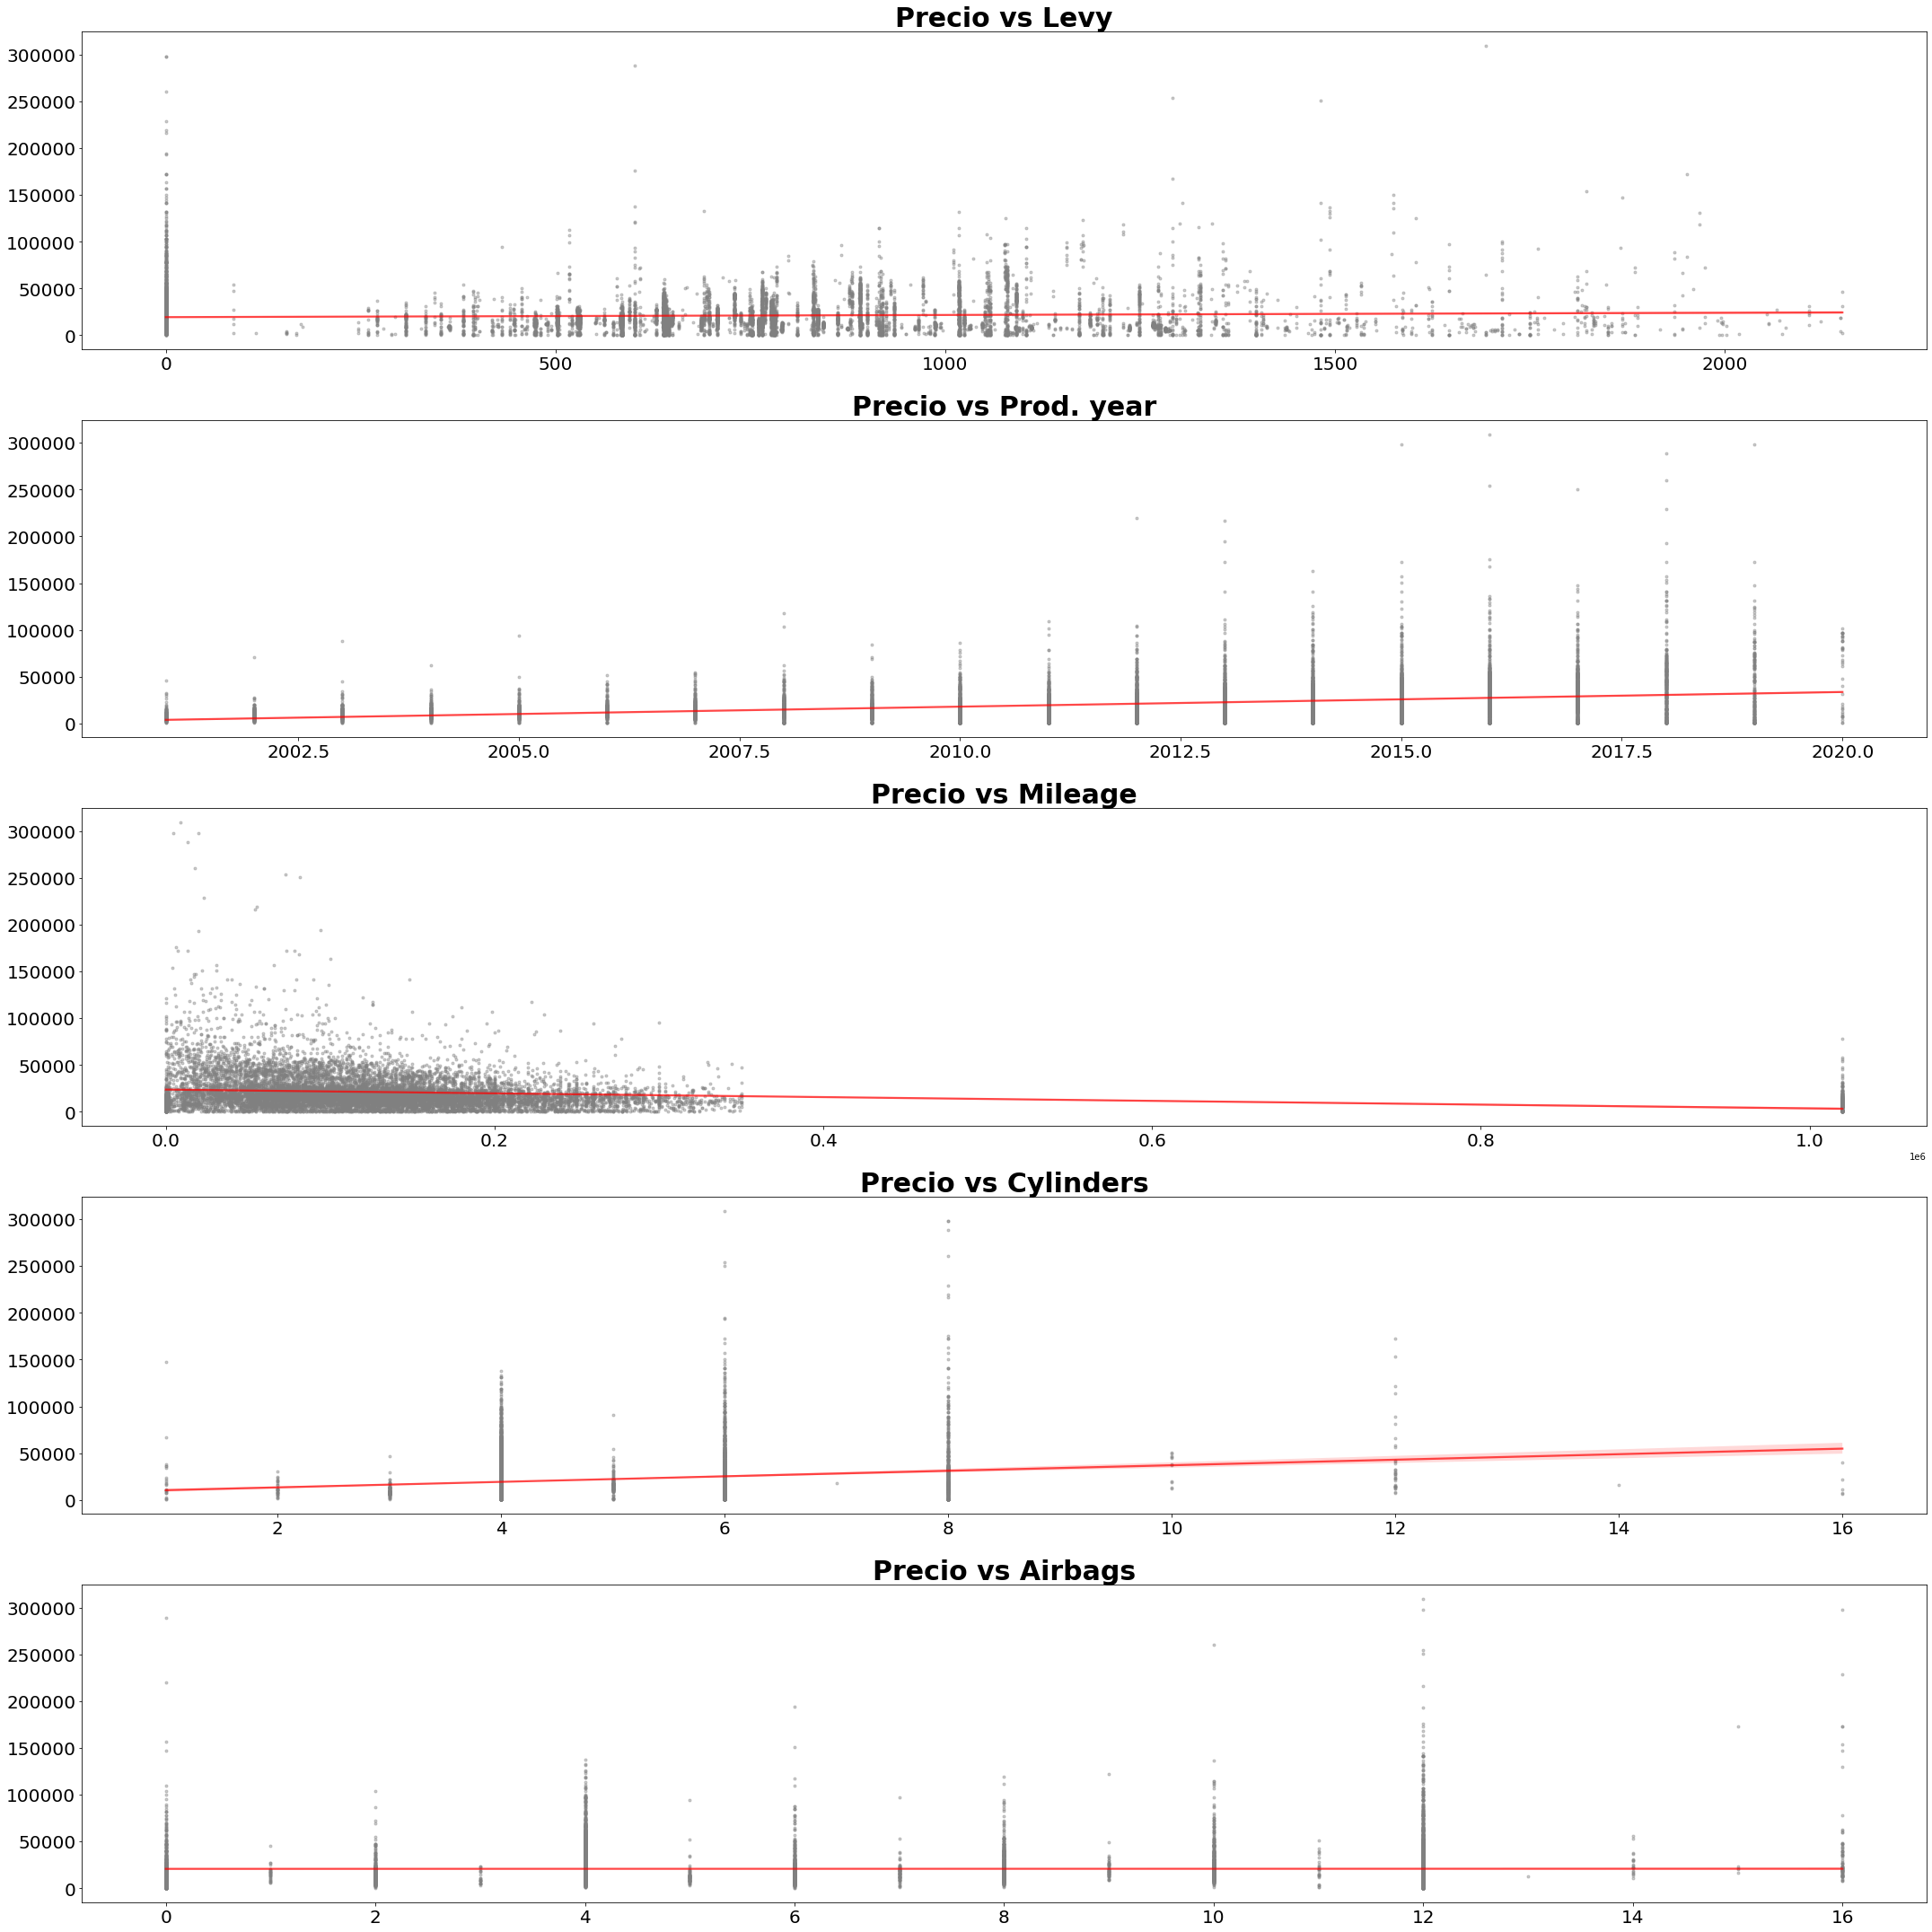

In [111]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (30, 30))


axes = axes.flat

columnas_numeric = df_limpio.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Price")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_limpio[colum], 
        y = df_limpio["Price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 30, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

Cómo podemos ver en las gráficas hay una tendencia de subida de precio  cuantos más cilindros tenga el coche y menos años tenga. 
No parece que el coste de los impuestos, la cantidad de airbags ni los kilometros que tiene el coche afecte en el precio ya que sigue una linea recta.

##### Variables categóricas

- Hacemos un gráfico para cada variable cualitativa

In [112]:
df_limpio.select_dtypes(include = ["object", "category"]).columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Gear box type', 'Drive wheels', 'Doors', 'Color'],
      dtype='object')

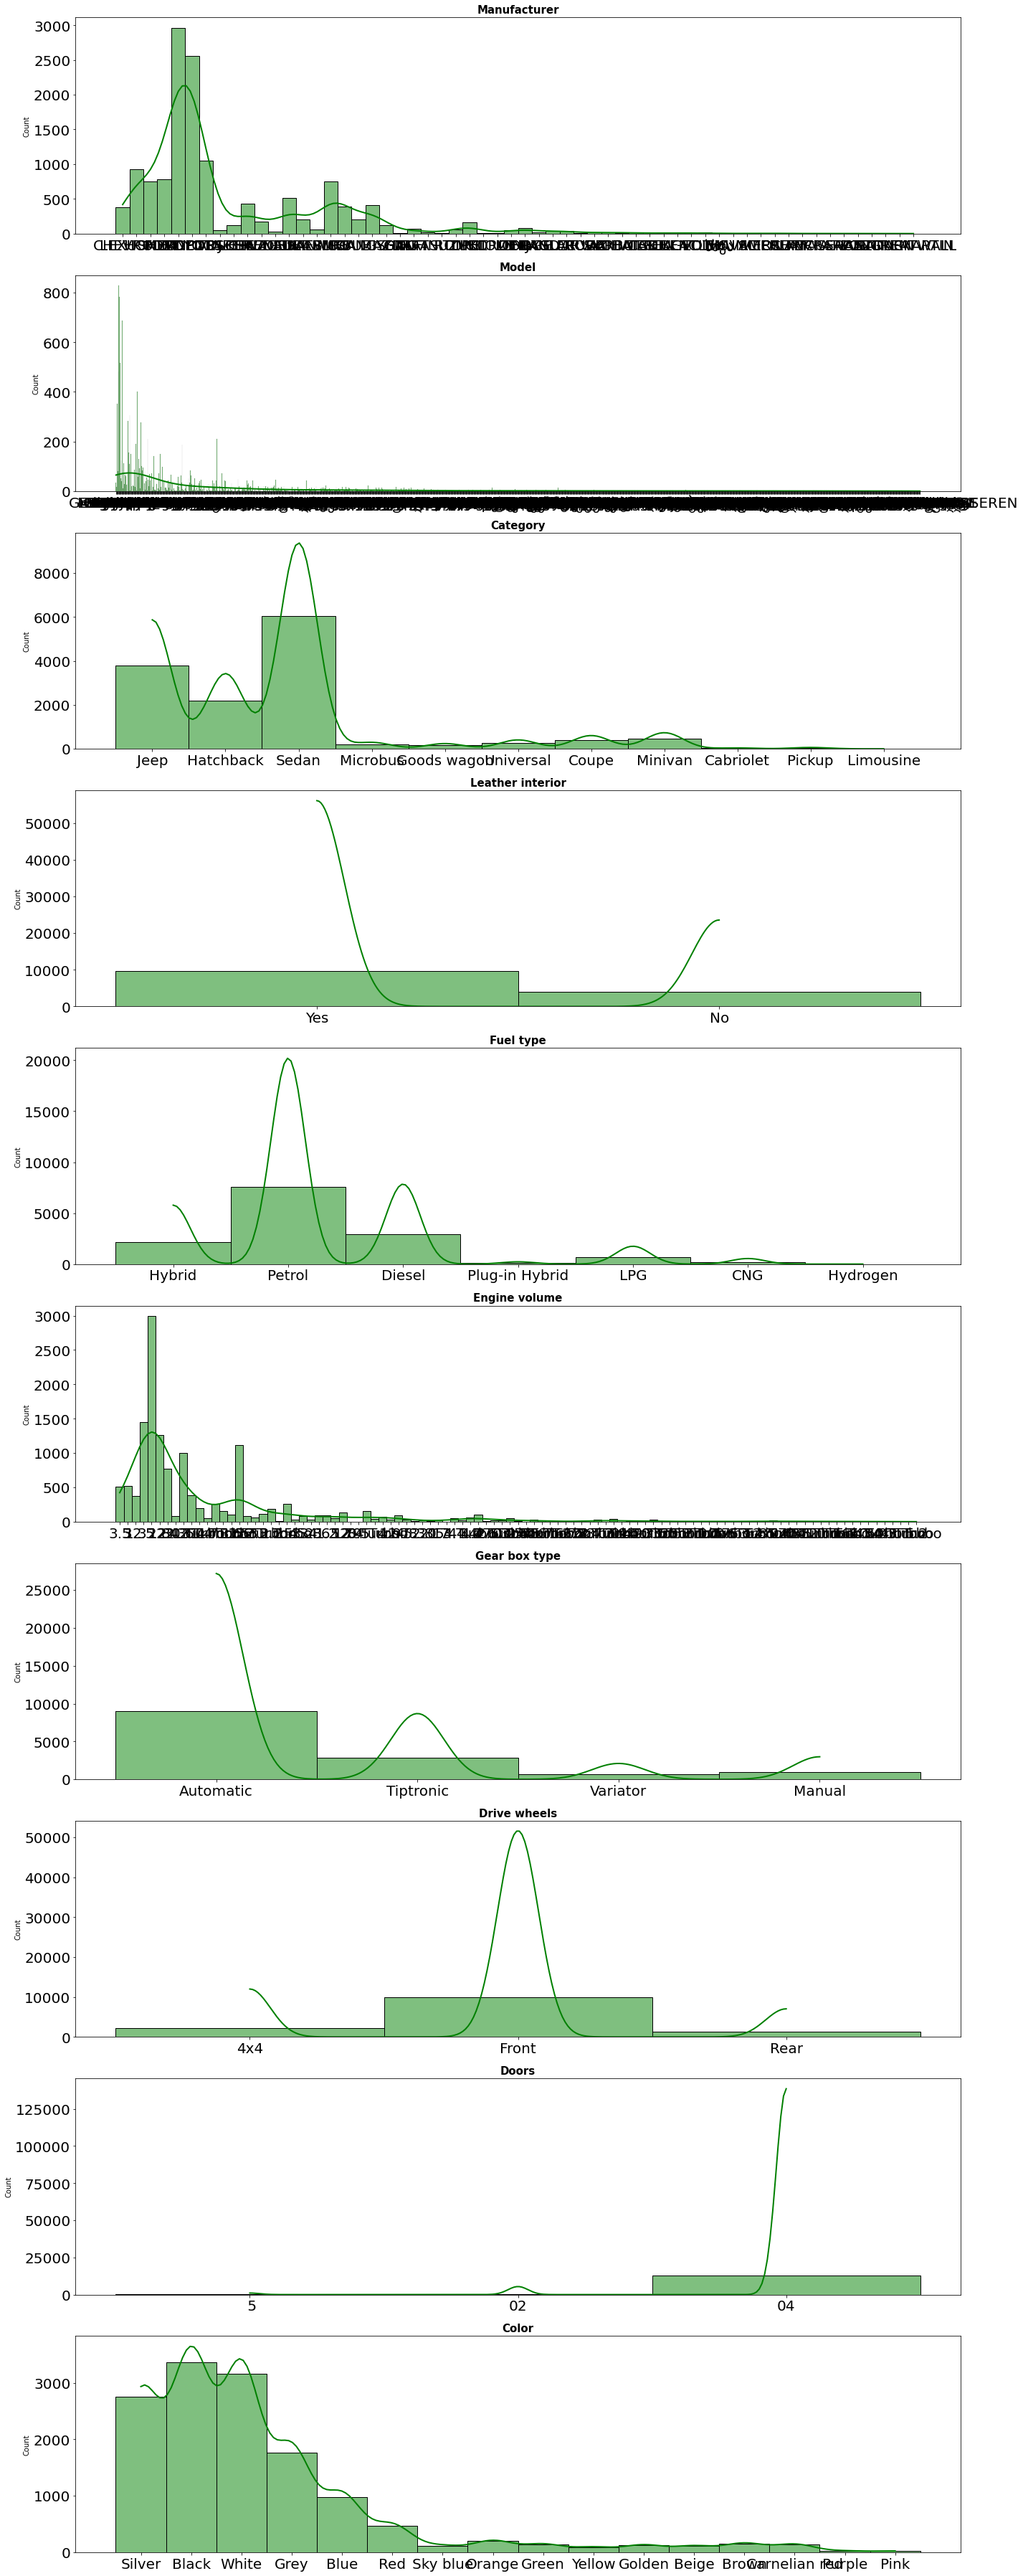

In [113]:
fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize = (20, 50))


axes = axes.flat

columnas_cualitativa = df_limpio.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cualitativa): 
    sns.histplot(
        data = df_limpio,
        x = colum,
        kde = True, 
        color = "Green", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

volvemos a chequear los nulos:

Guardamos el archivo en formato pickle para que nos conserve el tipo de datos de las columnas que hemos cambiado.

In [114]:
df_limpio.to_pickle('datos/cars_price1.pkl')

In [115]:
df_limpio.to_csv('datos/cars_price1.csv')